In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [14]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [15]:
trainX=trainX.reshape(60000,28,28,1)
testX=testX.reshape(10000,28,28,1)


In [16]:
trainX, testX=trainX/255.0, testX/255.0

In [17]:
from tensorflow.keras.utils import to_categorical
trainy_oh = to_categorical(trainy)
testy_oh = to_categorical(testy)

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [21]:
history = model.fit(trainX, trainy_oh, epochs=5, 
                    validation_data=(testX, testy_oh))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4888 - accuracy: 0.8189 - val_loss: 0.3586 - val_accuracy: 0.8682
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3087 - accuracy: 0.8866 - val_loss: 0.3184 - val_accuracy: 0.8860
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2659 - accuracy: 0.9014 - val_loss: 0.2816 - val_accuracy: 0.8978
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2374 - accuracy: 0.9114 - val_loss: 0.2723 - val_accuracy: 0.9054
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2119 - accuracy: 0.9214 - val_loss: 0.2554 - val_accuracy: 0.9067


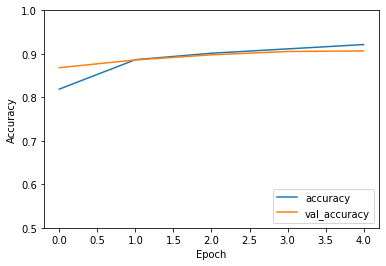

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')